## 作業
礙於不是所有同學都有 GPU ，這邊的範例使用的是簡化版本的 ResNet，確保所有同學都能夠順利訓練!


最後一天的作業請閱讀這篇非常詳盡的[文章](https://blog.gtwang.org/programming/keras-resnet-50-pre-trained-model-build-dogs-cats-image-classification-system/)，基本上已經涵蓋了所有訓練　CNN 常用的技巧，請使用所有學過的訓練技巧，盡可能地提高 Cifar-10 的 test data 準確率，截圖你最佳的結果並上傳來完成最後一次的作業吧!

另外這些技巧在 Kaggle 上也會被許多人使用，更有人會開發一些新的技巧，例如使把預訓練在 ImageNet 上的模型當成 feature extractor 後，再拿擷取出的特徵重新訓練新的模型，這些技巧再進階的課程我們會在提到，有興趣的同學也可以[參考](https://www.kaggle.com/insaff/img-feature-extraction-with-pretrained-resnet)

In [1]:
from keras.datasets import cifar10
from resnet_builder import resnet # 這是從 resnet_builder.py 中直接 import 撰寫好的 resnet 函數
from keras.models import Model
from keras.optimizers import Adam
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train = x_train / 255.
x_test = x_test / 255.
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


### Without augmentation-1 (Batch=32)

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 32, 32, 16)   448         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 32, 32, 16)   64          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 32, 32, 16)   0           batch_normalization_1[0][0]      
__________________________________________________________________________________________________
conv2d_2 (

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 69s 1ms/step - loss: 1.7720 - acc: 0.5156 - val_loss: 1.6010 - val_acc: 0.5525
Epoch 2/10
50000/50000 [==============================] - 62s 1ms/step - loss: 1.2694 - acc: 0.6614 - val_loss: 1.4002 - val_acc: 0.6067
Epoch 3/10
50000/50000 [==============================] - 62s 1ms/step - loss: 1.0900 - acc: 0.7166 - val_loss: 1.5087 - val_acc: 0.5816
Epoch 4/10
50000/50000 [==============================] - 62s 1ms/step - loss: 0.9759 - acc: 0.7577 - val_loss: 1.1125 - val_acc: 0.7107
Epoch 5/10
50000/50000 [==============================] - 62s 1ms/step - loss: 0.8986 - acc: 0.7839 - val_loss: 1.2070 - val_acc: 0.6852
Epoch 6/10
50000/50000 [==============================] - 62s 1ms/step - loss: 0.8396 - acc: 0.8037 - val_loss: 1.0227 - val_acc: 0.7444
Epoch 7/10
50000/50000 [==============================] - 61s 1ms/step - loss: 0.7946 - acc: 0.8181 - val_loss: 1.2218 - val_acc

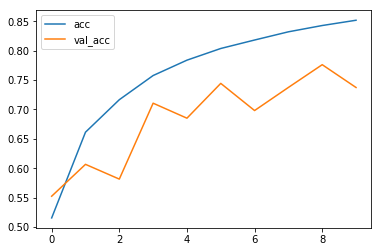

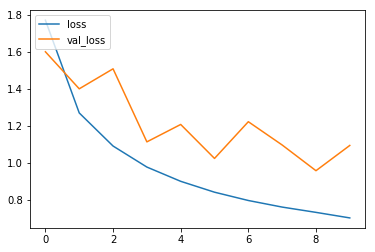

In [3]:
batch_size = 32 # batch 的大小，如果出現 OOM error，請降低這個值
num_classes = 10 # 類別的數量，Cifar 10 共有 10 個類別
epochs = 10 # 訓練的 epochs 數量

model = resnet(input_shape=(32,32,3)) 
model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

plt.plot(history.history['acc'],label='acc')
plt.plot(history.history['val_acc'], label='val_acc')
plt.legend(loc=2)
plt.show()
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend(loc=2)
plt.show()

### Without augmentation-2 (Batch=64)

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 49s 985us/step - loss: 1.7953 - acc: 0.5273 - val_loss: 1.5973 - val_acc: 0.5656
Epoch 2/10
50000/50000 [==============================] - 43s 861us/step - loss: 1.3016 - acc: 0.6703 - val_loss: 1.4706 - val_acc: 0.5933
Epoch 3/10
50000/50000 [==============================] - 43s 852us/step - loss: 1.0909 - acc: 0.7303 - val_loss: 1.3421 - val_acc: 0.6526
Epoch 4/10
50000/50000 [==============================] - 43s 855us/step - loss: 0.9604 - acc: 0.7740 - val_loss: 1.5493 - val_acc: 0.6075
Epoch 5/10
50000/50000 [==============================] - 43s 861us/step - loss: 0.8630 - acc: 0.8046 - val_loss: 1.4235 - val_acc: 0.6628
Epoch 6/10
50000/50000 [==============================] - 43s 862us/step - loss: 0.8011 - acc: 0.8240 - val_loss: 1.2101 - val_acc: 0.7027
Epoch 7/10
50000/50000 [==============================] - 43s 851us/step - loss: 0.7396 - acc: 0.8455 - val_loss: 1.

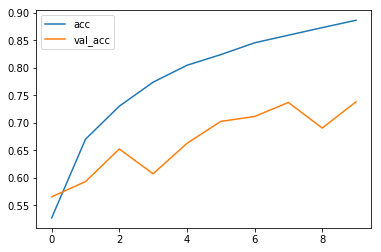

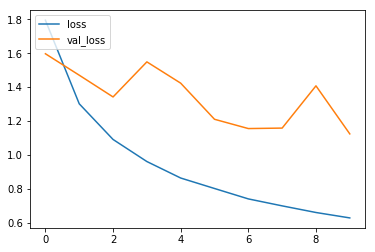

In [4]:
batch_size = 64 # batch 的大小，如果出現 OOM error，請降低這個值
num_classes = 10 # 類別的數量，Cifar 10 共有 10 個類別
epochs = 10 # 訓練的 epochs 數量

model = resnet(input_shape=(32,32,3)) 
#model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

plt.plot(history.history['acc'],label='acc')
plt.plot(history.history['val_acc'], label='val_acc')
plt.legend(loc=2)
plt.show()
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend(loc=2)
plt.show()

### Augmentation-1 (Rotate=10、shift_x=0.1、shift_y=0.1、flip_lr=true) Batch=64

Epoch 1/10
781/781 [==============================] - 53s 68ms/step - loss: 1.9002 - acc: 0.4810 - val_loss: 2.0894 - val_acc: 0.4555
Epoch 2/10
781/781 [==============================] - 42s 54ms/step - loss: 1.4193 - acc: 0.6206 - val_loss: 1.6102 - val_acc: 0.5767
Epoch 3/10
781/781 [==============================] - 42s 54ms/step - loss: 1.2252 - acc: 0.6786 - val_loss: 1.6279 - val_acc: 0.5841
Epoch 4/10
781/781 [==============================] - 42s 54ms/step - loss: 1.1032 - acc: 0.7159 - val_loss: 1.9981 - val_acc: 0.5261
Epoch 5/10
781/781 [==============================] - 42s 54ms/step - loss: 1.0191 - acc: 0.7408 - val_loss: 1.2069 - val_acc: 0.6796
Epoch 6/10
781/781 [==============================] - 42s 54ms/step - loss: 0.9524 - acc: 0.7634 - val_loss: 1.1275 - val_acc: 0.7128
Epoch 7/10
781/781 [==============================] - 42s 54ms/step - loss: 0.9048 - acc: 0.7763 - val_loss: 1.2729 - val_acc: 0.6804
Epoch 8/10
781/781 [==============================] - 42s 54ms

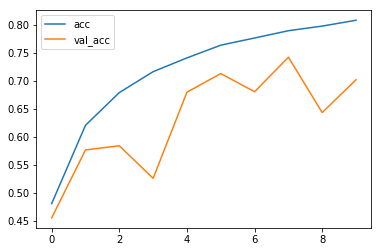

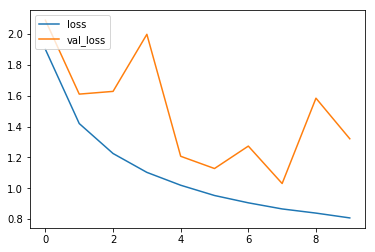

In [7]:
from keras.preprocessing.image import ImageDataGenerator

batch_size = 64 # batch 的大小，如果出現 OOM error，請降低這個值
num_classes = 10 # 類別的數量，Cifar 10 共有 10 個類別
epochs = 10 # 訓練的 epochs 數量

data_generator1 = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True)

model = resnet(input_shape=(32,32,3)) 
#model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

history = model.fit_generator(data_generator1.flow(x_train, y_train, batch_size=batch_size),
                              epochs=epochs,
                              validation_data=(x_test, y_test),
                              verbose=1,
                              steps_per_epoch=int(len(x_train)/batch_size))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

plt.plot(history.history['acc'],label='acc')
plt.plot(history.history['val_acc'], label='val_acc')
plt.legend(loc=2)
plt.show()
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend(loc=2)
plt.show()

### Augmentation + Learning rate-1 (Rotate=10、shift_x=0.1、shift_y=0.1、flip_lr=true、lr=0.01) Batch=64

In [16]:
# 學習率動態調整
def lr_schedule(epoch):
    lr = 1e-2
    if epoch > 10:
        lr *= 0.5e-3
    print('Learning rate: ', lr)
    return lr

Using real-time data augmentation.
Learning rate:  0.01
Epoch 1/10
Learning rate:  0.01
781/781 [==============================] - 59s 76ms/step - loss: 1.8205 - acc: 0.3914 - val_loss: 2.1681 - val_acc: 0.3363
Epoch 2/10
Learning rate:  0.01
781/781 [==============================] - 45s 57ms/step - loss: 1.5280 - acc: 0.4868 - val_loss: 1.9651 - val_acc: 0.3769
Epoch 3/10
Learning rate:  0.01
781/781 [==============================] - 45s 58ms/step - loss: 1.4174 - acc: 0.5300 - val_loss: 1.6062 - val_acc: 0.4652
Epoch 4/10
Learning rate:  0.01
781/781 [==============================] - 46s 59ms/step - loss: 1.3515 - acc: 0.5605 - val_loss: 1.8774 - val_acc: 0.4319
Epoch 5/10
Learning rate:  0.01
781/781 [==============================] - 46s 59ms/step - loss: 1.2959 - acc: 0.5825 - val_loss: 2.4932 - val_acc: 0.3951
Epoch 6/10
Learning rate:  0.01
781/781 [==============================] - 46s 58ms/step - loss: 1.2506 - acc: 0.6030 - val_loss: 1.6596 - val_acc: 0.4894
Epoch 7/10
Lea

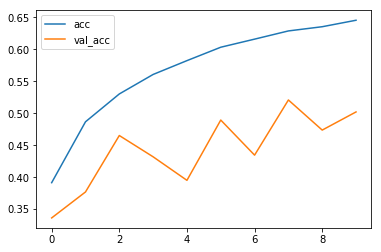

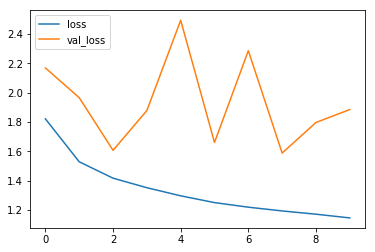

In [17]:
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras.callbacks import ReduceLROnPlateau

# Set batch_size
batch_size = 64 # batch 的大小，如果出現 OOM error，請降低這個值
num_classes = 10 # 類別的數量，Cifar 10 共有 10 個類別
epochs = 10 # 訓練的 epochs 數量

# Set tearning rate
lr_scheduler = LearningRateScheduler(lr_schedule)
lr_reducer = ReduceLROnPlateau(factor=np.sqrt(0.1),
                               cooldown=0,
                               patience=5,
                               min_lr=0.5e-6)
callbacks = [lr_reducer, lr_scheduler]
print('Using real-time data augmentation.')

# Training
model = resnet(input_shape=(32,32,3)) 
#model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=lr_schedule(0)),
              metrics=['accuracy'])

history = model.fit_generator(data_generator1.flow(x_train, y_train, batch_size=batch_size),
                              epochs=epochs,
                              validation_data=(x_test, y_test),
                              verbose=1,
                              steps_per_epoch=int(len(x_train)/batch_size),
                              callbacks=callbacks)
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

plt.plot(history.history['acc'],label='acc')
plt.plot(history.history['val_acc'], label='val_acc')
plt.legend(loc=2)
plt.show()
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend(loc=2)
plt.show()

### Augmentation + Learning rate-2 (Rotate=10、shift_x=0.1、shift_y=0.1、flip_lr=true、lr=0.01~1e-5) Batch=64

In [18]:
# 學習率動態調整
def lr_schedule(epoch):
    lr = 1e-2
    if epoch > 10:
        lr *= 0.5e-3
    elif epoch > 5:
        lr *= 1e-3
    print('Learning rate: ', lr)
    return lr

Using real-time data augmentation.
Learning rate:  0.01
Epoch 1/10
Learning rate:  0.01
781/781 [==============================] - 62s 79ms/step - loss: 1.8138 - acc: 0.3910 - val_loss: 3.0722 - val_acc: 0.2405
Epoch 2/10
Learning rate:  0.01
781/781 [==============================] - 47s 60ms/step - loss: 1.5010 - acc: 0.5004 - val_loss: 2.1591 - val_acc: 0.3607
Epoch 3/10
Learning rate:  0.01
781/781 [==============================] - 46s 60ms/step - loss: 1.3811 - acc: 0.5501 - val_loss: 3.0338 - val_acc: 0.3302
Epoch 4/10
Learning rate:  0.01
781/781 [==============================] - 47s 60ms/step - loss: 1.3038 - acc: 0.5847 - val_loss: 2.3156 - val_acc: 0.3920
Epoch 5/10
Learning rate:  0.01
781/781 [==============================] - 46s 59ms/step - loss: 1.2584 - acc: 0.6019 - val_loss: 1.5248 - val_acc: 0.5242
Epoch 6/10
Learning rate:  0.01
781/781 [==============================] - 46s 59ms/step - loss: 1.2315 - acc: 0.6142 - val_loss: 1.5474 - val_acc: 0.5532
Epoch 7/10
Lea

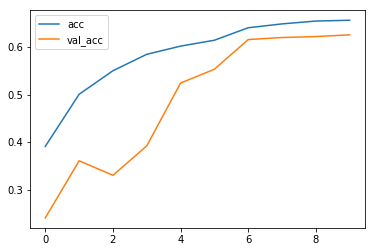

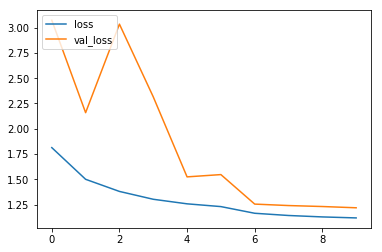

In [19]:
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras.callbacks import ReduceLROnPlateau

# Set batch_size
batch_size = 64 # batch 的大小，如果出現 OOM error，請降低這個值
num_classes = 10 # 類別的數量，Cifar 10 共有 10 個類別
epochs = 10 # 訓練的 epochs 數量

# Set tearning rate
lr_scheduler = LearningRateScheduler(lr_schedule)
lr_reducer = ReduceLROnPlateau(factor=np.sqrt(0.1),
                               cooldown=0,
                               patience=5,
                               min_lr=0.5e-6)
callbacks = [lr_reducer, lr_scheduler]
print('Using real-time data augmentation.')

# Training
model = resnet(input_shape=(32,32,3)) 
#model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=lr_schedule(0)),
              metrics=['accuracy'])

history = model.fit_generator(data_generator1.flow(x_train, y_train, batch_size=batch_size),
                              epochs=epochs,
                              validation_data=(x_test, y_test),
                              verbose=1,
                              steps_per_epoch=int(len(x_train)/batch_size),
                              callbacks=callbacks)
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

plt.plot(history.history['acc'],label='acc')
plt.plot(history.history['val_acc'], label='val_acc')
plt.legend(loc=2)
plt.show()
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend(loc=2)
plt.show()

### Augmentation + Learning rate-3 (Rotate=10、shift_x=0.1、shift_y=0.1、flip_lr=true、lr=0.001) Batch=64

In [20]:
# 學習率動態調整
def lr_schedule(epoch):
    lr = 1e-3
    print('Learning rate: ', lr)
    return lr

Using real-time data augmentation.
Learning rate:  0.001
Epoch 1/10
Learning rate:  0.001
781/781 [==============================] - 64s 82ms/step - loss: 1.8952 - acc: 0.4864 - val_loss: 1.6958 - val_acc: 0.5268
Epoch 2/10
Learning rate:  0.001
781/781 [==============================] - 47s 60ms/step - loss: 1.4065 - acc: 0.6275 - val_loss: 1.3500 - val_acc: 0.6335
Epoch 3/10
Learning rate:  0.001
781/781 [==============================] - 47s 60ms/step - loss: 1.2060 - acc: 0.6854 - val_loss: 1.2988 - val_acc: 0.6574
Epoch 4/10
Learning rate:  0.001
781/781 [==============================] - 46s 59ms/step - loss: 1.0876 - acc: 0.7241 - val_loss: 1.6079 - val_acc: 0.6144
Epoch 5/10
Learning rate:  0.001
781/781 [==============================] - 47s 60ms/step - loss: 1.0053 - acc: 0.7479 - val_loss: 1.3852 - val_acc: 0.6420
Epoch 6/10
Learning rate:  0.001
781/781 [==============================] - 47s 60ms/step - loss: 0.9415 - acc: 0.7664 - val_loss: 1.1052 - val_acc: 0.7284
Epoch 7

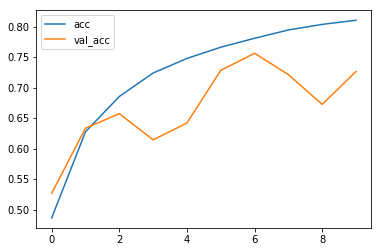

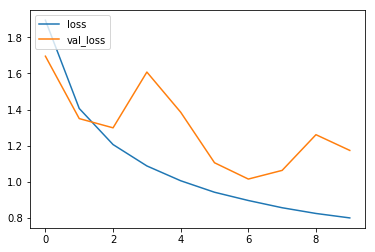

In [21]:
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras.callbacks import ReduceLROnPlateau

# Set batch_size
batch_size = 64 # batch 的大小，如果出現 OOM error，請降低這個值
num_classes = 10 # 類別的數量，Cifar 10 共有 10 個類別
epochs = 10 # 訓練的 epochs 數量

# Set tearning rate
lr_scheduler = LearningRateScheduler(lr_schedule)
lr_reducer = ReduceLROnPlateau(factor=np.sqrt(0.1),
                               cooldown=0,
                               patience=5,
                               min_lr=0.5e-6)
callbacks = [lr_reducer, lr_scheduler]
print('Using real-time data augmentation.')

# Training
model = resnet(input_shape=(32,32,3)) 
#model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=lr_schedule(0)),
              metrics=['accuracy'])

history = model.fit_generator(data_generator1.flow(x_train, y_train, batch_size=batch_size),
                              epochs=epochs,
                              validation_data=(x_test, y_test),
                              verbose=1,
                              steps_per_epoch=int(len(x_train)/batch_size),
                              callbacks=callbacks)
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

plt.plot(history.history['acc'],label='acc')
plt.plot(history.history['val_acc'], label='val_acc')
plt.legend(loc=2)
plt.show()
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend(loc=2)
plt.show()

### Augmentation + Learning rate-4 (Rotate=10、shift_x=0.1、shift_y=0.1、flip_lr=true、lr=0.01~0.001) Batch=64

In [22]:
# 學習率動態調整
def lr_schedule(epoch):
    lr = 1e-2
    if epoch > 10:
        lr *= 0.5e-3
    elif epoch > 3:
        lr *= 1e-1
    print('Learning rate: ', lr)
    return lr

Using real-time data augmentation.
Learning rate:  0.01
Epoch 1/10
Learning rate:  0.01
781/781 [==============================] - 65s 83ms/step - loss: 1.7793 - acc: 0.4142 - val_loss: 2.1905 - val_acc: 0.3464
Epoch 2/10
Learning rate:  0.01
781/781 [==============================] - 46s 59ms/step - loss: 1.4774 - acc: 0.5150 - val_loss: 1.8941 - val_acc: 0.3908
Epoch 3/10
Learning rate:  0.01
781/781 [==============================] - 48s 61ms/step - loss: 1.3564 - acc: 0.5662 - val_loss: 1.8849 - val_acc: 0.4437
Epoch 4/10
Learning rate:  0.01
781/781 [==============================] - 47s 61ms/step - loss: 1.2844 - acc: 0.5934 - val_loss: 1.9913 - val_acc: 0.4560
Epoch 5/10
Learning rate:  0.001
781/781 [==============================] - 48s 61ms/step - loss: 1.0960 - acc: 0.6588 - val_loss: 1.1926 - val_acc: 0.6319
Epoch 6/10
Learning rate:  0.001
781/781 [==============================] - 48s 61ms/step - loss: 1.0319 - acc: 0.6743 - val_loss: 1.2293 - val_acc: 0.6239
Epoch 7/10
L

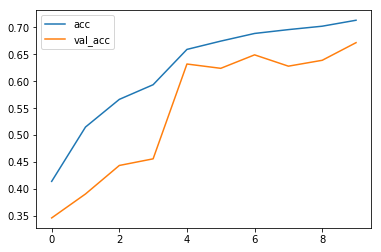

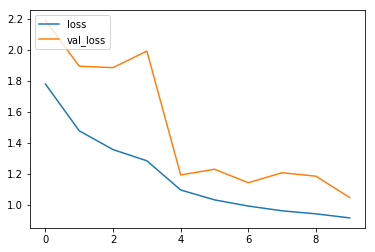

In [23]:
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras.callbacks import ReduceLROnPlateau

# Set batch_size
batch_size = 64 # batch 的大小，如果出現 OOM error，請降低這個值
num_classes = 10 # 類別的數量，Cifar 10 共有 10 個類別
epochs = 10 # 訓練的 epochs 數量

# Set tearning rate
lr_scheduler = LearningRateScheduler(lr_schedule)
lr_reducer = ReduceLROnPlateau(factor=np.sqrt(0.1),
                               cooldown=0,
                               patience=5,
                               min_lr=0.5e-6)
callbacks = [lr_reducer, lr_scheduler]
print('Using real-time data augmentation.')

# Training
model = resnet(input_shape=(32,32,3)) 
#model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=lr_schedule(0)),
              metrics=['accuracy'])

history = model.fit_generator(data_generator1.flow(x_train, y_train, batch_size=batch_size),
                              epochs=epochs,
                              validation_data=(x_test, y_test),
                              verbose=1,
                              steps_per_epoch=int(len(x_train)/batch_size),
                              callbacks=callbacks)
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

plt.plot(history.history['acc'],label='acc')
plt.plot(history.history['val_acc'], label='val_acc')
plt.legend(loc=2)
plt.show()
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend(loc=2)
plt.show()

### Augmentation + Learning rate-5 (Rotate=10、shift_x=0.1、shift_y=0.1、flip_lr=true、lr=0.01~0.0001) Batch=64

In [32]:
# 學習率動態調整
def lr_schedule(epoch):
    lr = 1e-3
    if epoch > 10:
        lr *= 0.5e-3
    elif epoch > 5:
        lr *= 1e-2
    elif epoch > 2:
        lr *= 1e-1
    print('Learning rate: ', lr)
    return lr

Using real-time data augmentation.
Learning rate:  0.001
Epoch 1/10
Learning rate:  0.001
781/781 [==============================] - 78s 100ms/step - loss: 1.9020 - acc: 0.4855 - val_loss: 2.0106 - val_acc: 0.4375
Epoch 2/10
Learning rate:  0.001
781/781 [==============================] - 51s 65ms/step - loss: 1.4470 - acc: 0.6164 - val_loss: 1.4001 - val_acc: 0.6310
Epoch 3/10
Learning rate:  0.001
781/781 [==============================] - 53s 68ms/step - loss: 1.2485 - acc: 0.6725 - val_loss: 1.2939 - val_acc: 0.6523 8s - loss: 1.2590 -  - ETA: 0s - loss: 1.2501 - a
Epoch 4/10
Learning rate:  0.0001
781/781 [==============================] - 53s 68ms/step - loss: 1.0383 - acc: 0.7455 - val_loss: 1.0153 - val_acc: 0.7555
Epoch 5/10
Learning rate:  0.0001
781/781 [==============================] - 53s 68ms/step - loss: 0.9815 - acc: 0.7620 - val_loss: 1.0810 - val_acc: 0.7368
Epoch 6/10
Learning rate:  0.0001
781/781 [==============================] - 53s 68ms/step - loss: 0.9452 - ac

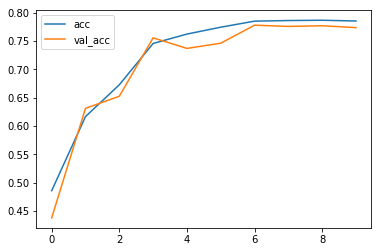

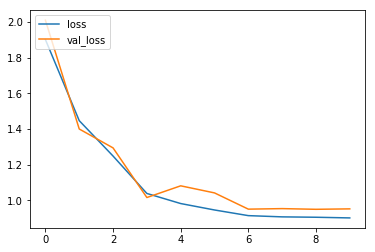

In [33]:
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras.callbacks import ReduceLROnPlateau

# Set batch_size
batch_size = 64 # batch 的大小，如果出現 OOM error，請降低這個值
num_classes = 10 # 類別的數量，Cifar 10 共有 10 個類別
epochs = 10 # 訓練的 epochs 數量

# Set tearning rate
lr_scheduler = LearningRateScheduler(lr_schedule)
lr_reducer = ReduceLROnPlateau(factor=np.sqrt(0.1),
                               cooldown=0,
                               patience=5,
                               min_lr=0.5e-6)
callbacks = [lr_reducer, lr_scheduler]
print('Using real-time data augmentation.')

# Training
#model = resnet(input_shape=(32,32,3), depth=38)
model = resnet(input_shape=(32,32,3))
#model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=lr_schedule(0)),
              metrics=['accuracy'])

history = model.fit_generator(data_generator1.flow(x_train, y_train, batch_size=batch_size),
                              epochs=epochs,
                              validation_data=(x_test, y_test),
                              verbose=1,
                              steps_per_epoch=int(len(x_train)/batch_size),
                              callbacks=callbacks)
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

plt.plot(history.history['acc'],label='acc')
plt.plot(history.history['val_acc'], label='val_acc')
plt.legend(loc=2)
plt.show()
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend(loc=2)
plt.show()